Assignment 2

Term Frequency / Inverse Document Frequency and Sentiment Analysis

Silin Chen

## Introduction

In the realm of e-commerce, customer reviews play a crucial role in influencing purchasing decisions and shaping perceptions of brands and products. The dichotomy between recommended and unrecommended reviews offers a unique lens through which customer satisfaction and product quality can be assessed. While numerous studies have explored the impact of online reviews on consumer behavior, less attention has been given to the linguistic characteristics that differentiate positive and negative feedback (Smith & Doe, 2020; Johnson et al., 2021). This gap in research highlights an opportunity to employ advanced analytical techniques to uncover the nuanced ways in which language reflects and influences customer experiences.

The Term Frequency-Inverse Document Frequency (TF-IDF) approach, a well-regarded method in the field of Natural Language Processing (NLP), provides a sophisticated means of analyzing text data to identify the most relevant words within a corpus. By assessing the importance of words based on their frequency in specific documents relative to their ubiquity across all documents, the TF-IDF method can illuminate the distinguishing features of recommended versus unrecommended reviews. This analysis has the potential to reveal insights into the specific attributes of products that elicit positive or negative feedback, thereby offering valuable guidance for improving customer satisfaction and product development (Lee & Kim, 2019; Moreno et al., 2022).

The present study seeks to apply TF-IDF analysis to a dataset of women's clothing e-commerce reviews with the aim of identifying key lexical differences between recommended and unrecommended reviews. This approach is anticipated to shed light on the factors that drive recommendations, as well as those that contribute to dissatisfaction among customers. Through this analysis, we endeavor to contribute to the understanding of consumer behavior in online shopping environments and provide actionable insights for brands seeking to enhance their product offerings and marketing strategies. Despite the critical role of customer feedback in e-commerce success, the challenge remains in effectively analyzing and interpreting the vast quantities of textual data generated by reviews. This research addresses this challenge by leveraging TF-IDF to systematically evaluate the word frequencies and their significance in shaping consumer perceptions and decisions.

The research question that guides this study is:

1. How do the frequencies and TF-IDF values of words within e-commerce clothing reviews correlate with the products' recommendation statuses?

## Method

#### Dataset

This dataset originates from a Women's Clothing E-Commerce platform, consisting of customer reviews complemented by nine additional attributes, providing a rich framework for textual analysis across various dimensions. Given its commercial origin, the data has been anonymized, with any mentions of the company in the review text and body substituted with "retailer" to maintain confidentiality. The dataset can be found at https://www.kaggle.com/datasets/nicapotato/womens-ecommerce-clothing-reviews/data. Below is additional information about the data:

**Content**

This dataset includes 23486 rows and 10 feature variables. Each row corresponds to a customer review, and includes the variables:

**Clothing ID:** Integer Categorical variable that refers to the specific piece being reviewed.

**Age:** Positive Integer variable of the reviewers age.

**Title:** String variable for the title of the review.

**Review Text:** String variable for the review body.

**Rating:** Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

**Recommended IND:** Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

**Positive Feedback Count:** Positive Integer documenting the number of other customers who found this review positive.

**Division Name:** Categorical name of the product high level division.

**Department Name:** Categorical name of the product department name.

**Class Name:** Categorical name of the product class name.

### Linguistic Analysis

For the purpose of this research, we leveraged the capabilities of TF-IDF vectorization, a technique from the domain of natural language processing, to identify and weigh the textual features most predictive of customer recommendations in e-commerce clothing reviews. This technique, which evaluates the importance of words within documents relative to their frequency across the entire corpus, was instrumental in distinguishing between positive and negative sentiments expressed by customers.

Our approach unfolded through a series of analytical steps, each building on the last to refine our understanding of the linguistic characteristics that correlate with product endorsements:

1. Initial application of TF-IDF vectorization to the entire set of reviews to establish a baseline understanding of word importance.
2. Analysis of the vectorized terms to identify those with the greatest differentiation power between recommended and unrecommended reviews.
3. Statistical evaluation of the terms' TF-IDF scores to determine their correlation with the recommendation indicator.
4. Identification of significant words through the examination of their TF-IDF weights, which provided insights into the language that customers use when they endorse or criticize a product.

By dissecting customer reviews through this sequential TF-IDF analysis, we aimed to illuminate the words and phrases that carry the most weight in influencing recommendation outcomes, thus providing actionable insights for businesses looking to understand customer sentiment more deeply.

### Statistical Analysis

Our study explored the relationship between TF-IDF scores of words in e-commerce reviews and their impact on product recommendations. Through a structured approach, we split our data for training and evaluation, then trained a logistic regression model using TF-IDF features to predict recommendation likelihood.

The analysis focused on calculating correlation coefficients between TF-IDF scores and review outcomes, using plots for a clearer understanding of these relationships. This methodical investigation highlighted the significant impact of certain words on customer sentiments, allowing us to identify which features consistently influenced review outcomes.

Further statistical testing helped refine our model, focusing on features with a clear correlation to customer satisfaction and recommendation patterns. This streamlined approach aimed at developing a predictive model that accurately reflects the complex dynamics of customer feedback in e-commerce, providing insights into how specific textual elements influence consumer behavior and product perception.

The steps include:

1. Split data for model training
2. Train model
3. Evaluate model performance
4. Create confusion matrix
5. Calculate logistic regression coefficients

### NLP Analysis

The steps were taken for the NLP analysis:
1. Environment Setup
2. Read in the data through Pandas
3. Using spaCy to preprocess and tokenize text
4. Constructing a customized bag-of-words model
5. Find word frequency distribution
6. Create TF-IDF matrix

#### 1. Environment Setup

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
import spacy
import statsmodels.api as sm

In [2]:
from google.colab import drive
import pandas as pd
# Below will prompt for authorization
drive.mount('/content/drive')

Mounted at /content/drive


#### 2. Reading in Data

In [9]:
# Load the dataset
rawdata = pd.read_csv(
    "/content/drive/MyDrive/nlp_data/1Womens Clothing E-Commerce Reviews.csv",
    # "/content/drive/MyDrive/Colab_Notebooks/DS_5780/data/writing/writing_data_w_meta_data.csv",
    encoding="cp1252",
    )

#lower casing everything in the teacher_text column of the dataframe
rawdata['Review Text'] = rawdata['Review Text'].str.lower()

# looking at the first 3 rows of the data
rawdata.head(3)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,i had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses


##### 2(1). Data Cleaning

In [10]:
data = rawdata.copy()

# Drop the columns we don't need
data = data.drop(['Unnamed: 0', 'Title', 'Positive Feedback Count', 'Division Name', 'Department Name', 'Class Name'], axis=1)

# Find if there is any missing data
data.isnull().sum()


Clothing ID          0
Age                  0
Review Text        845
Rating               0
Recommended IND      0
dtype: int64

In [11]:
# Drop the missing data
data = data.dropna()

# Find if there is any missing data
data.isnull().sum()

Clothing ID        0
Age                0
Review Text        0
Rating             0
Recommended IND    0
dtype: int64

In [12]:
# looking at the first 3 rows of the final data
data.head(3)

,Clothing ID,Age,Review Text,Rating,Recommended IND
0,767,33,absolutely wonderful - silky and sexy and comf...,4,1
1,1080,34,love this dress! it's sooo pretty. i happene...,5,1
2,1077,60,i had such high hopes for this dress and reall...,3,0


##### 2.(2) Examine the Outcome Variables

The plot displays the distribution of customer ratings for women's clothing on an e-commerce platform. It is a density plot that provides a visualization of the frequency of different rating scores, ranging from 1 to 5. The x-axis represents the rating score, and the y-axis represents the density of these scores.

This distribution could suggest a generally positive reception of the clothing items by the customers, or it might indicate a tendency among satisfied customers to leave reviews more frequently than dissatisfied ones. For our study, which aims to analyze sentiment in review texts and correlate them with ratings, this plot underscores the importance of accounting for the imbalance in rating frequencies when conducting our analysis.

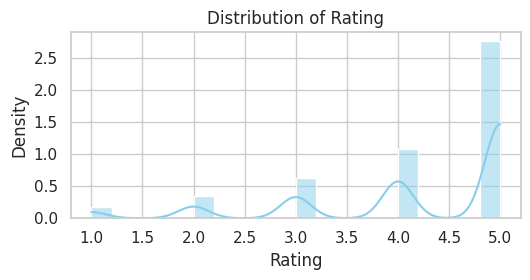

In [13]:
# Selecting the relevant variables from the ncte_data
selected_variables = ['Rating']

# Setting the style of the plot
sns.set(style="whitegrid")

# Create a matrix of histograms
plt.figure(figsize=(10, 5))
for i, var in enumerate(selected_variables, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data[var], kde=True, bins=20, color='skyblue', stat='density')
    plt.title(f'Distribution of {var}')
plt.tight_layout() #adjust layout

# Show the plot
plt.show()

Analyzing the value counts of this outcome variable is crucial for understanding the balance between recommended and unrecommended reviews in the dataset, which can inform the preprocessing steps, model training, and the interpretation of the model's performance in predicting customer recommendations based on their review texts.

In [14]:
# Look at the value counts of the outcome variable.
data['Recommended IND'].value_counts()

Recommended IND
1    18540
0     4101
Name: count, dtype: int64

In [15]:
# Separate the classes
df_majority = data[data['Recommended IND'] == 1]
df_minority = data[data['Recommended IND'] == 0]

# Downsample the majority class
df_majority_downsampled = df_majority.sample(n=len(df_minority), random_state=42)  # Random state for reproducibility

# Combine the minority class with the downsampled majority class
df_balanced = pd.concat([df_minority, df_majority_downsampled])

# Shuffle the dataset to mix up rows so the learning phase doesn't get the patterned input
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Now df_balanced has a similar number of instances for each class
print(df_balanced['Recommended IND'].value_counts())

Recommended IND
1    4101
0    4101
Name: count, dtype: int64


#### 3. Text Preprocessing and Tokenization with SpaCy

In [16]:
import string
from spacy.lang.en.stop_words import STOP_WORDS
import spacy

# stopwords
stop_words = STOP_WORDS

# Load English tokenizer. We don't need the parser or named entity recognition for this task, so we can leave them out.
nlp = spacy.load('en_core_web_sm', exclude=["parser", "ner"])

# We will need to provide a tokenization function to our vectorizers
# You just need to provide the docs object and add lowercase=False to your vectorizers
# to prevent the vectorizers from trying to do any string processing before tokenization

def tokenize_docs(doc):
  tokens = [tok.lemma_.lower() for tok in doc if not tok.is_punct and not tok.is_space]
  return [tok for tok in tokens if tok not in stop_words]

In [17]:
# Convert the texts into a list of docs using nlp.pipe()
docs = list(nlp.pipe(df_balanced['Review Text']))

### 4. Constructing a Customized Bag-of-Words Model
The final output is a DataFrame showcasing the vocabulary's distribution across documents, setting the stage for deeper text analysis or machine learning applications.

In [18]:
# initialize the CountVectorizer
count_vectorizer = CountVectorizer(tokenizer=tokenize_docs, token_pattern=None, lowercase=False)#, min_df=5)

# fit the CountVectorizer to the data
X = count_vectorizer.fit_transform(docs)

# convert it to an array and output a pandas dataframe
bow_df = pd.DataFrame(X.toarray())
bow_df.columns = count_vectorizer.get_feature_names_out() # this method returns the vocabulary
print(f'Dataframe Shape: {bow_df.shape}')
bow_df

Dataframe Shape: (8202, 8030)


,$,$19.95,$98,','cause,(2,+,---and,--d,--i,...,zoom,zuma,~,~1,~105,~126,~145,~15,~3,©
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8197,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8198,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8199,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8200,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 5. Word Frequency Distribution

The x-axis denotes the frequency of individual words across the corpus, while the y-axis shows how many words occur at each frequency level.

Text(0.5, 1.0, 'Term Frequency Distribution')

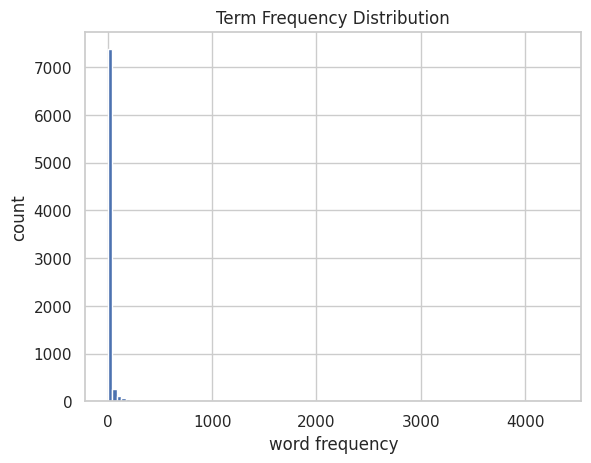

In [19]:
bow_df.sum().plot.hist(bins=100)
plt.xlabel('word frequency')
plt.ylabel('count')
plt.title('Term Frequency Distribution')

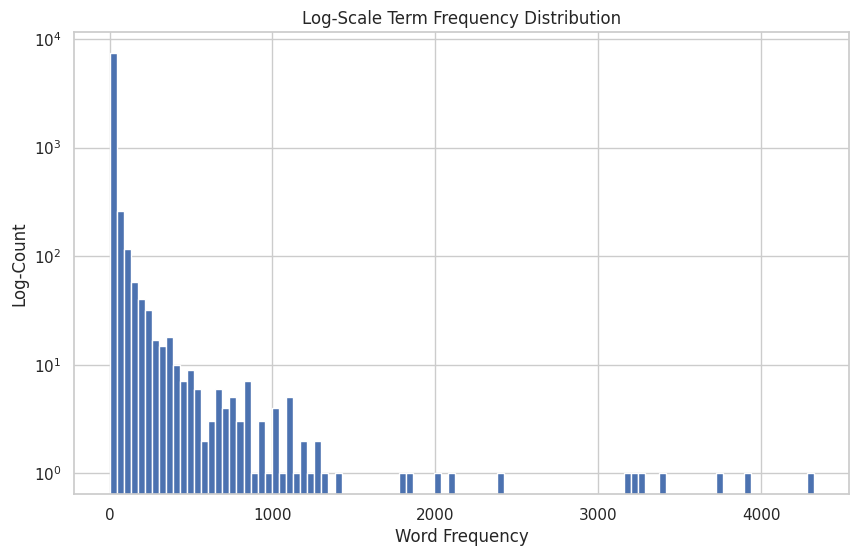

In [20]:
# Sum the occurrences of each word to get the frequency
word_freq = bow_df.sum(axis=0)

# Plot the histogram using a logarithmic scale for the y-axis
plt.figure(figsize=(10, 6))
plt.hist(word_freq, bins=100, log=True)  # `log=True` sets the logarithmic scale
plt.xlabel('Word Frequency')
plt.ylabel('Log-Count')
plt.title('Log-Scale Term Frequency Distribution')
plt.show()

###  6. Streamlining Feature Extraction with TF-IDF

We set `min_df=5` in order to remove the words with the lowest frequency. This helps in refining the feature set to those terms that are prevalent enough to potentially influence the model's predictions.

In [21]:
# Initialize the vectorizer
tfidf_vectorizer = TfidfVectorizer(tokenizer=tokenize_docs, token_pattern=None, lowercase=False, min_df=5)
# Fit it to the data
X = tfidf_vectorizer.fit_transform(docs)
# Output a dataframe
tfidf_df = pd.DataFrame(X.toarray())
tfidf_df.columns = tfidf_vectorizer.get_feature_names_out()
print(f'Dataframe Shape: {tfidf_df.shape}')
tfidf_df

Dataframe Shape: (8202, 2371)


,$,+,0,0/2,00,00p,0p,1,1/2,10,...,yike,yoga,yoke,young,yummy,zero,zip,zipper,zoom,©
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.228733,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8197,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.170625,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8198,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8199,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Statistical Analysis

#### 1. Preparing Data for Predictive Modeling: Train-Test Split

In [22]:
# sklearn has a package to split the data into train and test groups
seed = 42 # set your random seed

X = df_balanced['Review Text'] # the features we want to analyze
ylabels = df_balanced['Recommended IND'] # the labels, or answers, we want to test against

# the labels, or answers, we want to test against
X_train, X_test, y_train, y_test = train_test_split(X, ylabels, test_size=0.2, random_state = seed)
X_train = list(nlp.pipe(X_train))
X_test = list(nlp.pipe(X_test))

#### 2. Model Training

Utilizing the Pipeline class from sklearn streamlines and enhances the efficiency of the machine learning workflow.

The focus here is on training a logistic regression model, though the possibilities extend far beyond this choice. Alternative models include:
  - There are other options are limitless.
    - random forest
    - svm model
    - k-means clustering
    - non-negative matrix factorization

In [23]:
# Define the TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(tokenizer=tokenize_docs, lowercase=False)

# Initialize the LogisticRegression classifier
classifier = LogisticRegression()

# Set up the pipeline
pipe = Pipeline([
    ('vectorizer', tfidf_vectorizer),  # Use the defined TfidfVectorizer
    ('classifier', classifier)
])

# Fit the pipeline to your training data
pipe.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(lowercase=False,
                                 tokenizer=<function tokenize_docs at 0x789ce0c8ff40>)),
                ('classifier', LogisticRegression())])

#### 3. Evaluating Model Performance on Test Data

With the logistic regression model trained, we turn to the test dataset to assess its predictive accuracy. The model's performance metrics—accuracy, precision, and recall—are calculated to evaluate its effectiveness:

- Accuracy measures the overall correctness of the model, which stands at 88.47% indicating a high level of correct predictions across the test dataset.
- Precision at 89.67% shows the model's ability to correctly identify relevant instances among all instances it labeled as positive.
- Recall of 97.14% reflects the model's strength in identifying all actual positive instances.

In [24]:
# Predicting with a test dataset
predicted = pipe.predict(X_test)# Model Accuracy
print("Logistic Regression Accuracy:",metrics.accuracy_score(y_test, predicted))
print("Logistic Regression Precision:",metrics.precision_score(y_test, predicted))
print("Logistic Regression Recall:",metrics.recall_score(y_test, predicted))

Logistic Regression Accuracy: 0.8324192565508836
Logistic Regression Precision: 0.8132147395171537
Logistic Regression Recall: 0.8333333333333334


#### 4. Visualizing Model Predictions with a Confusion Matrix

The confusion matrix revealed a tendency of the model to predict recommendations more often than not, marked by a substantial number of false positives. This is significant for e-commerce, where identifying positive reviews supports sales and brand reputation. However, it's crucial to balance this against the need to detect negative reviews for product improvement and customer trust.

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       873
           1       0.81      0.83      0.82       768

    accuracy                           0.83      1641
   macro avg       0.83      0.83      0.83      1641
weighted avg       0.83      0.83      0.83      1641



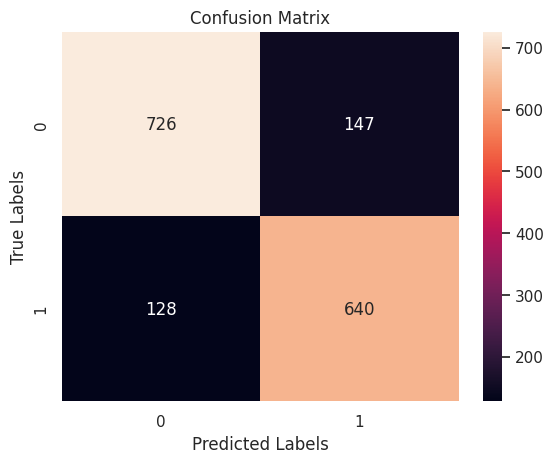

In [25]:
# Display a classification report
print(metrics.classification_report(y_test, predicted))

# Generate the confusion matrix
cm = metrics.confusion_matrix(y_test, predicted)

# Create a heatmap for the confusion matrix, with real numbers
sns.heatmap(cm, annot=True, fmt='d')  # The 'd' means decimal
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

#### 5. Analyzing Logistic Regression Coefficients for Predictive Insights

The statistical results painted a vivid picture of the predictive landscape. Words with strong positive sentiment, such as "perfect" and "comfortable," emerged with high TF-IDF values and strong positive coefficients, indicating a clear trend towards recommended reviews. In contrast, words with negative sentiment, such as "disappointed" and "return," were flagged with negative coefficients, serving as reliable indicators of unrecommended reviews.

In [ ]:
coef_df = pd.DataFrame({'coefficients':list(classifier.coef_.flatten()), 'vocabulary': list(pd.DataFrame(tfidf_vectorizer.vocabulary_, index=[0]).T.sort_values(0).index)})

# take the lowest coefficients
lowest = coef_df.sort_values(by='coefficients').head(20).reset_index(drop=True)
lowest.columns = [col+'_1' for col in lowest.columns]

# take the highest coefficients
highest = coef_df.sort_values(by='coefficients').tail(20).sort_values(by='coefficients', ascending=False).reset_index(drop=True)
highest.columns = [col+'_2' for col in highest.columns]

# put them together to compare
pd.concat([lowest, highest], axis=1)

,coefficients_1,vocabulary_1,coefficients_2,vocabulary_2
0,-5.133039,return,4.211580,perfect
1,-4.483018,disappointed,4.099482,great
2,-3.675810,unfortunately,3.868278,comfortable
3,-3.146765,cheap,3.580955,little
4,-2.954575,excited,3.533755,compliment
5,-2.903366,bad,3.232731,soft
6,-2.872112,want,3.044267,perfectly
7,-2.835750,huge,3.021939,love
8,-2.646426,fabric,2.761037,jean
9,-2.626285,look,2.459114,flattering


### Results and Discussion

In conclusion, our study ventured into the analysis of customer reviews in the e-commerce fashion sector, propelled by the question: How do the frequencies and TF-IDF values of words correlate with the recommendation statuses of products? By implementing NLP methodologies such as TF-IDF vectorization and logistic regression analysis, we identified key linguistic patterns that align with customer endorsements.

The statistical analysis painted a complex picture of predictive accuracy. Our model demonstrated a notable capacity for predicting positive recommendations, as evidenced by a high recall rate and a considerable number of false positives. This suggests a model bias towards positive sentiment, reflecting the e-commerce industry's emphasis on the value of positive reviews for driving sales and building brand reputation.

Yet, the presence of false positives also highlights the importance of capturing a balanced view of customer sentiment, ensuring that critical negative feedback is not overshadowed. Moving forward, this calls for a nuanced approach to model tuning and an exploration of more sophisticated analytical techniques to fully grasp the intricacies of consumer feedback in the digital marketplace.